In [1]:
library('magrittr')
library('tibble')
library('dplyr')
library('tidyr')
library('ggplot2')
library('RColorBrewer')
library('readr')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
bx_data <-
    read_csv(
        'preprints.csv',
        col_types=cols(
            `is_revision`=col_factor(levels=c('True', 'False')),
            `master_id`=col_character(),
            `node_id`=col_character(),
            `preprint_type`=col_factor(levels=c('','Confirmatory Results', 'Contradictory Results', 'Evolutionary Biology', 'Genomics', 'N/A', 'New Results', 'Regular Article', 'Withdrawn')),
            `pub_date`=col_character(),
            `title`=col_character(),
            `version_id`=col_character(),
            .default=col_number()
        )
    )

bx_data %>% head

is_revision,master_id,node_id,preprint_type,pub_date,pub_date_day,pub_date_month,pub_date_year,title,version_id
True,000026,2293,New Results,"September 08, 2014",8,9,2014,A Population Genetic Signature of Polygenic Local Adaptation,000026v2
True,000042,266,New Results,"December 01, 2013",1,12,2013,Routes for breaching and protecting genetic privacy,000042v3
False,000067,110,New Results,"November 07, 2013",7,11,2013,Genetics of single-cell protein abundance variation in large yeast populations,000067v1
True,000075,960,New Results,"March 30, 2014",30,3,2014,A Scalable Formulation for Engineering Combination Therapies for Evolutionary Dynamics of Disease,000075v2
False,000091,112,New Results,"November 07, 2013",7,11,2013,Designing Robustness to Temperature in a Feedforward Loop Circuit,000091v1
False,000109,113,New Results,"November 07, 2013",7,11,2013,Speciation and introgression between Mimulus nasutus and Mimulus guttatus,000109v1


In [3]:
org_opts <- options()

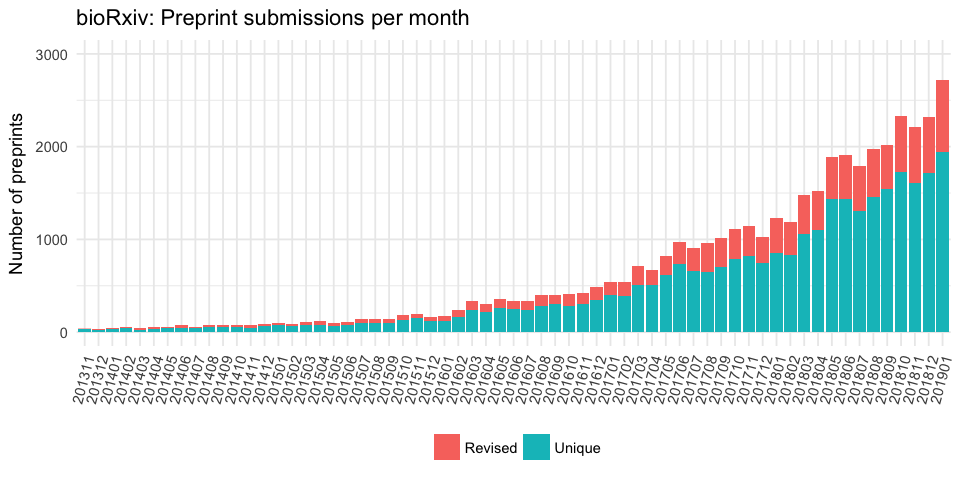

In [4]:
options(repr.plot.width=8, repr.plot.height=4)

sum_plot <-
    bx_data %>%
    filter(!(`pub_date_year` == 2019 & `pub_date_month` == 2)) %>%
    group_by(`pub_date_year`, `pub_date_month`, is_revision) %>%
    summarize(`pub_count` = n()) %>%
    ungroup() %>%
    mutate(
        `pub_date_combined` = factor((`pub_date_year` * 100) + `pub_date_month`),
        `post_rev` = if_else(`is_revision` == 'True', "Revised", "Unique")
    ) %>%
    ggplot(aes(x=`pub_date_combined`, y=`pub_count`, fill=`post_rev`)) +
        geom_col() +
        theme_minimal() +
        theme(
            axis.title.x=element_blank(),
            axis.text.x=element_text(angle=75, hjust=1),
            legend.position="bottom"
        ) +
        ylab("Number of preprints") +
        ggtitle('bioRxiv: Preprint submissions per month') +
        guides(fill=guide_legend(title="")) +
        ylim(0, 3000)

sum_plot

In [5]:
png('num-of-preprints-per-month.png')
sum_plot
dev.off()

pdf 
  2

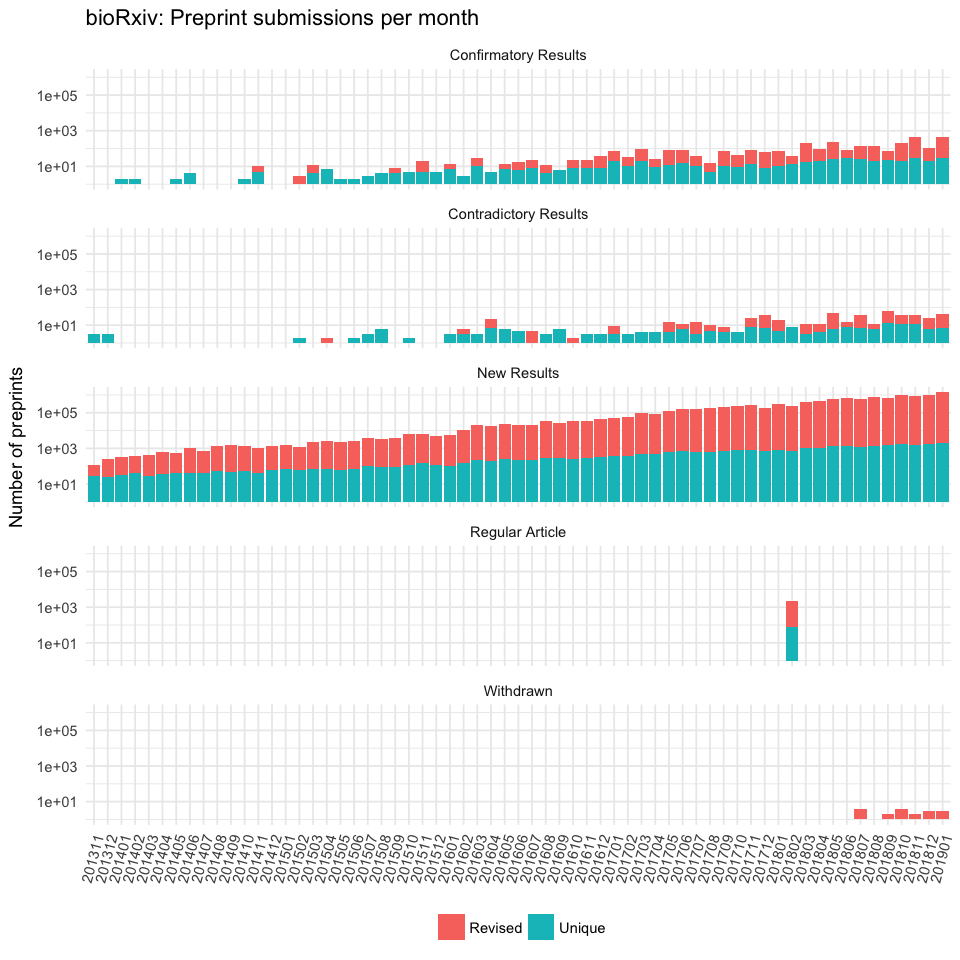

In [6]:
options(repr.plot.width=8, repr.plot.height=8)

sum_plot_2 <-
    bx_data %>%
    filter(!(`pub_date_year` == 2019 & `pub_date_month` == 2)) %>%
    group_by(`pub_date_year`, `pub_date_month`, `is_revision`, `preprint_type`) %>%
    summarize(`pub_count` = n()) %>%
    ungroup() %>%
    mutate(
        `pub_date_combined` = factor((`pub_date_year` * 100) + `pub_date_month`),
        `post_rev` = if_else(`is_revision` == 'True', "Revised", "Unique")
    ) %>%
    filter(
        `preprint_type` %in% c('Withdrawn',
                              'Regular Article',
                              'Contradictory Results',
                              'Confirmatory Results',
                              'New Results')
    ) %>%
    ggplot(aes(x=`pub_date_combined`, y=`pub_count`, fill=`post_rev`)) +
        geom_col() +
        theme_minimal() +
        theme(
            axis.title.x=element_blank(),
            axis.text.x=element_text(angle=75, hjust=1),
            legend.position="bottom"
        ) +
        ylab("Number of preprints") +
        ggtitle('bioRxiv: Preprint submissions per month') +
        guides(fill=guide_legend(title="")) +
        facet_wrap(~`preprint_type`, ncol=1) +
        scale_y_log10()

sum_plot_2

In [7]:
png('num-of-preprints-per-month-per-category.png')
sum_plot_2
dev.off()

pdf 
  2